In [13]:
import numpy as np
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import rainflow


In [7]:
def rainflow_counting(soc_time_series):
    # Initialize variables
    cycles = []
    soc_diff = np.diff(soc_time_series)

    # Identify peaks and valleys
    peaks = np.where(soc_diff < 0)[0] + 1
    valleys = np.where(soc_diff > 0)[0] + 1

    # Pair adjacent peaks and valleys
    for peak, valley in zip(peaks, valleys):
        cycles.append((peak, valley))

    # Rainflow counting
    ranges = [soc_time_series[cycle[0]] - soc_time_series[cycle[1]] for cycle in cycles]
    half_ranges = [abs(r) / 2.0 for r in ranges]
    counts = {half_range: half_ranges.count(half_range) for half_range in set(half_ranges)}

    return counts, soc_diff, peaks, valleys

In [8]:
def calculate_soh(rainflow_counts, total_cycles):
    damage = sum(count * (half_range**3) for half_range, count in rainflow_counts.items())
    soh = 1 - (damage / total_cycles)**(1/3)
    return soh

Rainflow Counts: {0.1: 1, 0.30000000000000004: 1, 0.09999999999999998: 1, 0.19999999999999998: 1, 0.4: 1, 0.0: 1, 0.04999999999999999: 1, 0.35000000000000003: 1}
State of Health (SoH): 0.8035721949531754
Total cycles of the input data 19
Soc diff time series [ 0.3  0.3 -0.5  0.3 -0.4  0.7 -0.5  0.3 -0.6  0.1  0.3  0.3 -0.5  0.3
 -0.4  0.7 -0.5  0.3 -0.6]
Peaks happen at [ 3  5  7  9 13 15 17 19]
Valleys happen at [ 1  2  4  6  8 10 11 12 14 16 18]


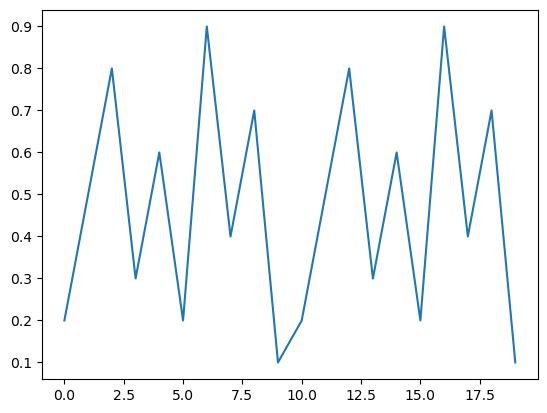

In [15]:
# Example usage
soc_time_series = np.array([0.2, 0.5, 0.8, 0.3, 0.6, 0.2, 0.9, 0.4, 0.7, 0.1, 0.2, 0.5, 0.8, 0.3, 0.6, 0.2, 0.9, 0.4, 0.7, 0.1])
total_cycles = len(soc_time_series) - 1  # Total number of cycles is the length of time series minus 1

rainflow_counts, soc_diff, peaks, valleys = rainflow_counting(soc_time_series)
soh = calculate_soh(rainflow_counts, total_cycles)



print("Rainflow Counts:", rainflow_counts)
print("State of Health (SoH):", soh)
print("Total cycles of the input data", total_cycles)
print("Soc diff time series", soc_diff)
print("Peaks happen at", peaks)
print("Valleys happen at", valleys)

plt.plot(soc_time_series)

In [16]:
rainflow.count_cycles(soc_time_series)

[(0.29999999999999993, 2.0),
 (0.3, 2.0),
 (0.6000000000000001, 2.0),
 (0.7, 0.5),
 (0.8, 1.5)]

In [17]:
def calculate_soh(cycle_type, total_number, DOD):
    damage = sum(count * (half_range**3) for half_range, count in rainflow_counts.items())
    soh = 1 - (damage / total_cycles)**(1/3)
    return soh

SyntaxError: invalid syntax (923598291.py, line 1)

In [ ]:
#Defining battery stress parameter
k1=0.02778/100
k2= 2